In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = "/content/Training data.xlsx"
data = pd.read_excel(path)
data


,internet,sex,traveltime,studytime,freetime,absences,age,iq,marks
0,no,M,2,2,5,6,18,118,73.13
1,yes,M,2,2,2,7,19,107,67.78
2,yes,M,3,3,3,5,18,108,70.84
3,no,F,3,3,4,9,17,100,66.68
4,yes,M,1,4,3,4,19,96,71.88
...,...,...,...,...,...,...,...,...,...
995,yes,M,2,1,1,9,18,108,64.12
996,no,M,1,2,2,2,19,109,75.47
997,yes,M,2,2,1,5,17,123,76.73
998,yes,F,1,3,3,8,17,104,69.07


In [29]:
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)



In [30]:
def feature_changing(x_train):
  for i in range(x_train.shape[0]):
    x_train[i,0] = 1 if x_train[i, 0] == 'yes' else 0
    x_train[i,1] = 1 if x_train[i,1] == 'M' else 0
#   columns_to_drop = [0, 1, 4, 5, 6]
#  # Drop the specified columns
#   x_train = np.delete(x_train, columns_to_drop, axis=1)
  return x_train

x_train = feature_changing(x_train)
print(x_train)


[[0 1 2 ... 6 18 118]
 [1 1 2 ... 7 19 107]
 [1 1 3 ... 5 18 108]
 ...
 [1 1 2 ... 5 17 123]
 [1 0 1 ... 8 17 104]
 [1 1 1 ... 6 18 128]]


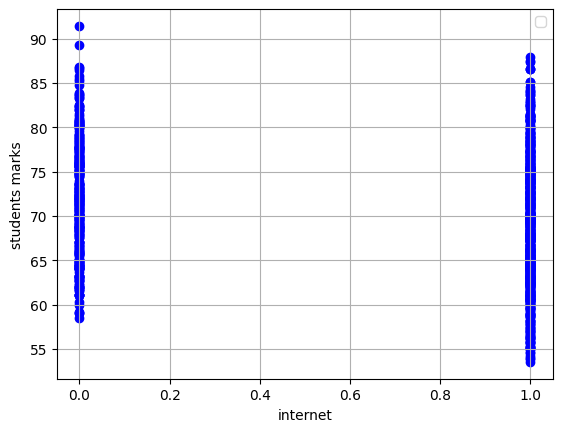

In [31]:
plt.scatter(x_train[:, 0], y_train[:, 0], color='blue')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'internet')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()


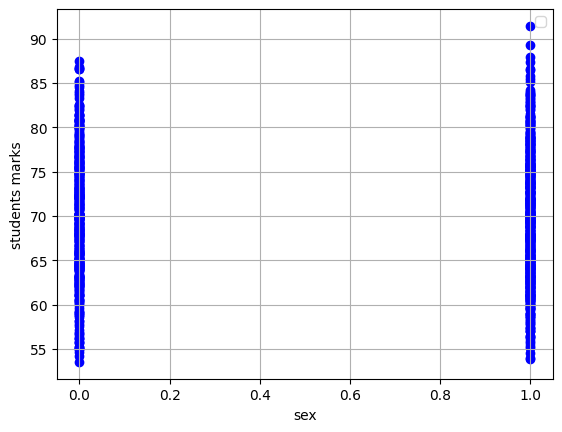

In [32]:
plt.scatter(x_train[:, 1], y_train[:, 0], color='blue')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'sex')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()

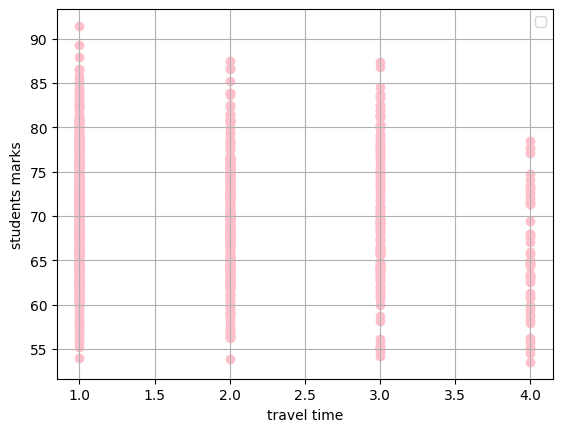

In [33]:
plt.scatter(x_train[:, 2], y_train[:, 0], color='pink')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'travel time')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


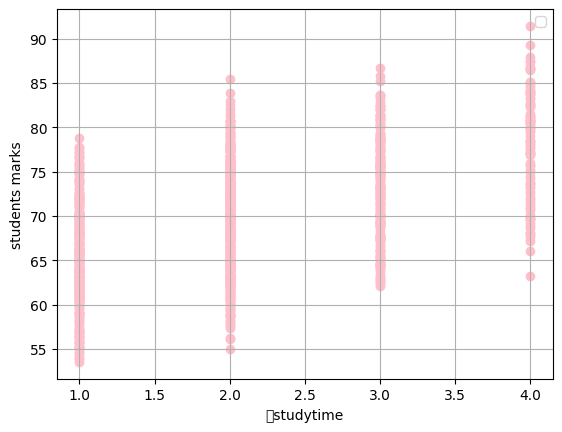

In [34]:
plt.scatter(x_train[:, 3], y_train[:, 0], color='pink')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'	studytime')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()

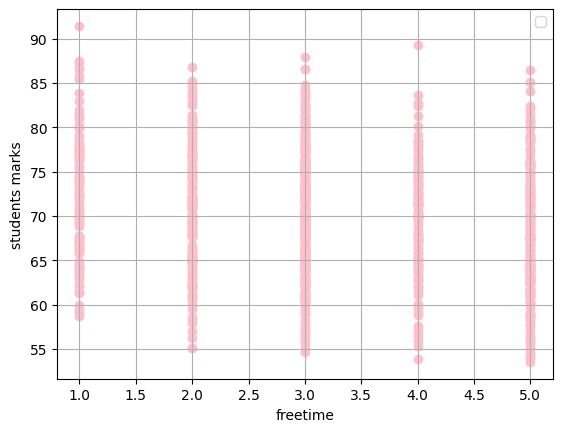

In [35]:
plt.scatter(x_train[:, 4], y_train[:, 0], color='pink')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'freetime')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()

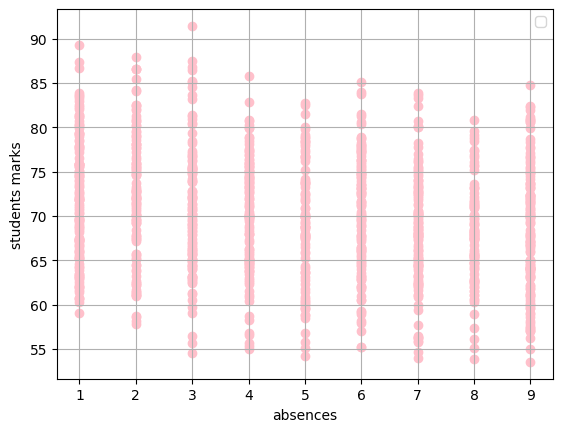

In [36]:
plt.scatter(x_train[:, 5], y_train[:, 0], color='pink')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'absences')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()

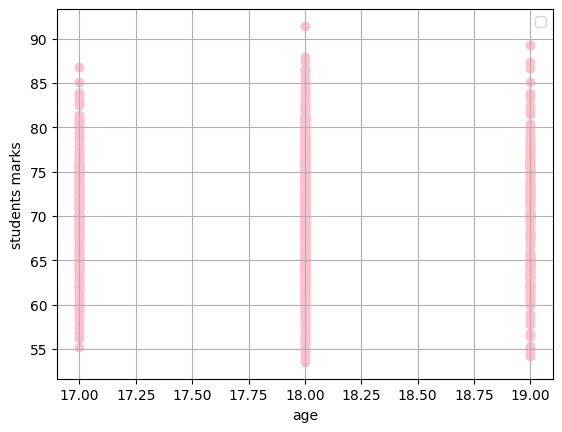

In [37]:
plt.scatter(x_train[:, 6], y_train[:, 0], color='pink')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'age')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()

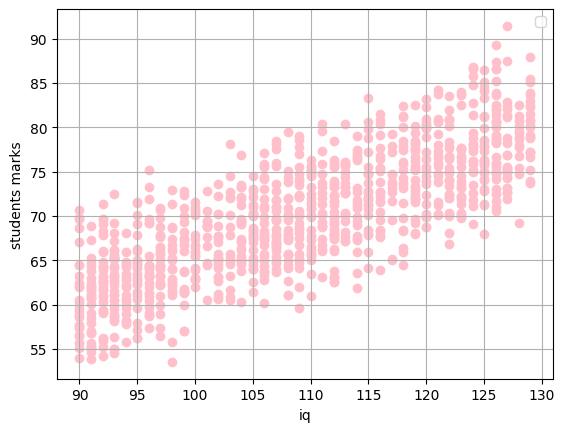

In [38]:
plt.scatter(x_train[:, 7], y_train[:, 0], color='pink')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'iq')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# code for feature scaling
def z_score(x_train):
   # find the mean of each column/feature
    x_mean = np.mean(x_train, axis=0)
    # find the standard deviation of each column/feature
    x_std = np.std(x_train, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    x_train = (x_train - x_mean) / x_std

    return x_train,x_std,x_mean

In [26]:
# Use mean square error as cost function
def cost(x_train, y_train, w, b):
    m = x_train.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = np.dot(x_train[i, :], w) + b
        cost = (f_wb - y_train[i, 0]) ** 2
        cost_sum = cost_sum + cost
    loss = (1 / (2 * m)) * cost_sum
    return loss

In [27]:
def gradient_descent(x_train, y_train, w, b, iterations=1, alpha= 0.1, m=100):
    for iter in range(iterations):
        dj_db = 0
        dj_dw = np.zeros_like(w)
        for i in range(m):
            f_wb = np.dot(x_train[i, :], w) + b
            dj_dw_i = ((f_wb - y_train[i]) * x_train[i, :]).reshape(-1, 1)
            dj_db_i = f_wb - y_train[i]
            dj_db += dj_db_i
            dj_dw += dj_dw_i

        dj_dw = dj_dw / m
        dj_db = dj_db / m

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

    return w, b


In [28]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('/content/Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('/content/Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
